<a href="https://colab.research.google.com/github/hoofitech/fintech-practice/blob/main/do-it-pandas/08.%20calculate%20by%20grouping/08_%EA%B7%B8%EB%A3%B9%EC%9C%BC%EB%A1%9C_%EB%AC%B6%EC%96%B4_%EA%B3%84%EC%82%B0%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08-1. 데이터 집계하기

### groupby() 메서드로 데이터 집계하기

In [2]:
#1. 갭마인더 데이터셋 불러오기
import pandas as pd

df = pd.read_csv('gapminder.tsv', sep = '\t')
print(df)

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]


In [3]:
#2. groupby() 메서드로 연도를 나타내는 year 열을 기준으로 데이터를 그룹화하고 mean() 메서드로 기대 수명을 나타내는 lifeExp 열의 평균을 구한다.
avg_life_exp_by_year = df.groupby('year')["lifeExp"].mean()
print(avg_life_exp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [4]:
#groupby() 메서드는 열의 고윳값 또는 여러 열을 조합한 고윳값의 하위 집합을 생성하는 역할을 한다
years = df.year.unique()
print(years)
#unique() 메서드로 확인한 year열의 고윳값

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


In [5]:
#3. 고윳값별로 데이터의 하위 집합을 추출하기, year 열의 고윳값 하나를 골라 해당 연도의 데이터를 살펴본다.
y1952 = df.loc[df.year == 1952, :]
print(y1952)

                 country continent  year  lifeExp       pop    gdpPercap
0            Afghanistan      Asia  1952   28.801   8425333   779.445314
12               Albania    Europe  1952   55.230   1282697  1601.056136
24               Algeria    Africa  1952   43.077   9279525  2449.008185
36                Angola    Africa  1952   30.015   4232095  3520.610273
48             Argentina  Americas  1952   62.485  17876956  5911.315053
...                  ...       ...   ...      ...       ...          ...
1644             Vietnam      Asia  1952   40.412  26246839   605.066492
1656  West Bank and Gaza      Asia  1952   43.160   1030585  1515.592329
1668         Yemen, Rep.      Asia  1952   32.548   4963829   781.717576
1680              Zambia    Africa  1952   42.038   2672000  1147.388831
1692            Zimbabwe    Africa  1952   48.451   3080907   406.884115

[142 rows x 6 columns]


In [6]:
#4. 이렇게 추출한 하위 집합에도 메서드를 적용할 수 있다.lifeExp 열의 평균을 구해본다
y1952_mean = y1952["lifeExp"].mean()
print(y1952_mean)

49.057619718309866


## groupby() 메서드와 함께 사용하는 집계 메서드

describe()를 사용하면 여러 요약 통계를 한 번에 확인할 수 있다.

In [7]:
#continent 열로 그룹화하고 describe() 메서드를 호출하면 대륙별 요약 통계를 확인할 수 있다.
continent_describe = df.groupby('continent')["lifeExp"].describe()
print(continent_describe)

           count       mean        std     min       25%      50%       75%  \
continent                                                                     
Africa     624.0  48.865330   9.150210  23.599  42.37250  47.7920  54.41150   
Americas   300.0  64.658737   9.345088  37.579  58.41000  67.0480  71.69950   
Asia       396.0  60.064903  11.864532  28.801  51.42625  61.7915  69.50525   
Europe     360.0  71.903686   5.433178  43.585  69.57000  72.2410  75.45050   
Oceania     24.0  74.326208   3.795611  69.120  71.20500  73.6650  77.55250   

              max  
continent          
Africa     76.442  
Americas   80.653  
Asia       82.603  
Europe     81.757  
Oceania    81.235  


## agg() 메서드와 groupby 메서드 조합하기

### 다른 라이브러리의 집계 함수 사용하기

In [8]:
#agg() 메서드에 넘파이의 mean() 함수를 전달하여 평균을 구할 수 있다.
import numpy as np

cont_le_agg = df.groupby('continent')["lifeExp"].agg(np.mean)
print(cont_le_agg)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64


/tmp/ipython-input-8-2000605079.py:4: FutureWarning: The provided callable <function mean at 0x7de8ef1c23e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  cont_le_agg = df.groupby('continent')["lifeExp"].agg(np.mean)


### 사용자 집계 함수 사용하기

In [9]:
# 라이브러리에서 제공하는 집계 메서드로는 원하는 값을 계산할 수 없다면 직접 함수를 만들어서 agg()에 전달하면 됨
#1. 평균을 구하는 함수 직접 만들기
def my_mean(values):
  n = len(values)
  sum=0
  for value in values:
    sum+= value
  return sum / n

In [10]:
#2. agg()에 my_mean으로 전달하기
agg_my_mean = df.groupby('year')["lifeExp"].agg(my_mean)
print(agg_my_mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [11]:
#3. 매개변수가 여러개인 사용자 함수 전달하기
# 사용자 함수의 첫 번째 매개변수가 데이터프레임의 시리즈여야 한다
#연도나 대륙과 상관없이 전체 기대 수명의 평균 diff_value와 각 그룹 평균 수명의 차이를 계산하는 my_mean_diff() 함수 생성
def my_mean_diff(values, diff_value):
  n = len(values)
  sum = 0
  for value in values:
    sum += value
  mean = sum / n
  return(mean - diff_value)

In [12]:
#4. 모든 기대 수명의 평균
global_mean = df["lifeExp"].mean()
print(global_mean)

59.474439366197174


In [13]:
#5. my_mean_diff( )함수를 agg() 메서드에 전달
agg_mean_diff = (
    df
    .groupby("year")
    ["lifeExp"]
    .agg(my_mean_diff, diff_value = global_mean) #첫 번째 매개변수는 함수 이름, 두 번째부터는 함수의 매개변수 이름과 함께 전달
)

print(agg_mean_diff)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


여러 개의 집계 함수 한 번에 사용하기

In [14]:
#여러개의 집계함수를 한 번에 사용하고 싶다면 집계 함수들을 리스트 형식으로 agg() 또는 aggregate() 메서드에 전달
gdf = (
    df
    .groupby("year")
    ["lifeExp"]
    .agg([np.count_nonzero, np.mean, np.std])
)

print(gdf)

      count_nonzero       mean        std
year                                     
1952            142  49.057620  12.225956
1957            142  51.507401  12.231286
1962            142  53.609249  12.097245
1967            142  55.678290  11.718858
1972            142  57.647386  11.381953
1977            142  59.570157  11.227229
1982            142  61.533197  10.770618
1987            142  63.212613  10.556285
1992            142  64.160338  11.227380
1997            142  65.014676  11.559439
2002            142  65.694923  12.279823
2007            142  67.007423  12.073021


/tmp/ipython-input-14-278240479.py:6: FutureWarning: The provided callable <function mean at 0x7de8ef1c23e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg([np.count_nonzero, np.mean, np.std])
/tmp/ipython-input-14-278240479.py:6: FutureWarning: The provided callable <function std at 0x7de8ef1c2520> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  .agg([np.count_nonzero, np.mean, np.std])


agg()나 aggregate() 메서드에 딕셔너리 사용하기

In [15]:
#1. 데이터프레임에 사용하기
# 데이터프레임의 열을 키로, 집계 함수를 값으로 설정
# 하나 이상의 변수를 그룹화하고 열별로 서로 다른 집계 함수를 적용할 수 있다
gdf_dict = df.groupby("year").agg(
    {
        "lifeExp" : "mean",
        "pop" : "median",
        "gdpPercap" : "median"
    }
)

print(gdf_dict)

        lifeExp         pop    gdpPercap
year                                    
1952  49.057620   3943953.0  1968.528344
1957  51.507401   4282942.0  2173.220291
1962  53.609249   4686039.5  2335.439533
1967  55.678290   5170175.5  2678.334740
1972  57.647386   5877996.5  3339.129407
1977  59.570157   6404036.5  3798.609244
1982  61.533197   7007320.0  4216.228428
1987  63.212613   7774861.5  4280.300366
1992  64.160338   8688686.5  4386.085502
1997  65.014676   9735063.5  4781.825478
2002  65.694923  10372918.5  5319.804524
2007  67.007423  10517531.0  6124.371108


In [16]:
#2. 시리즈에 사용하기
# 원하는 함수 목록을 agg()에 전달하고나서 rename() 메서드로 결과 열의 이름을 변경
gdf = (
    df
    .groupby("year")
    ["lifeExp"]
    .agg(
        [
            np.count_nonzero,
            np.mean,
            np.std
        ]
    )
    .rename(
        columns={
            "count_nonzero" : "count",
            "mean" : "avg",
            "std" : "std_dev",
        }
    )
    .reset_index()
)

print(gdf
      )

    year  count        avg    std_dev
0   1952    142  49.057620  12.225956
1   1957    142  51.507401  12.231286
2   1962    142  53.609249  12.097245
3   1967    142  55.678290  11.718858
4   1972    142  57.647386  11.381953
5   1977    142  59.570157  11.227229
6   1982    142  61.533197  10.770618
7   1987    142  63.212613  10.556285
8   1992    142  64.160338  11.227380
9   1997    142  65.014676  11.559439
10  2002    142  65.694923  12.279823
11  2007    142  67.007423  12.073021


/tmp/ipython-input-16-2121402306.py:7: FutureWarning: The provided callable <function mean at 0x7de8ef1c23e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(
/tmp/ipython-input-16-2121402306.py:7: FutureWarning: The provided callable <function std at 0x7de8ef1c2520> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  .agg(


## 08-2. 데이터 변환하기

## 표준점수 계산하기

표준점수 계산 함수 만들기

In [17]:
#1. 표준점수를 계산하는 사용자 함수를 만든다
def my_zscore(x):
  return ((x - x.mean()) / x.std())

In [18]:
#2. transfrom( 메서드를 사용하여 my_zscore() 함수로 year 열의 lifeExp를 변환
transform_z = df.groupby('year')["lifeExp"].transform(my_zscore)
print(transform_z)

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
          ...   
1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, Length: 1704, dtype: float64


In [19]:
#3. 원본 데이터프레임 df 크기와 변환한 데이터프레임 transform_z의 크기를 비교
print(df.shape)
print(transform_z.shape)

(1704, 6)
(1704,)


In [20]:
#4. spicy 라이브러리의 zscore()함수가 존재한다
!pip install scipy

from scipy.stats import zscore
sp_z_grouped = df.groupby('year')["lifeExp"].transform(zscore)
sp_z_nogroup = zscore(df["lifeExp"])

print(transform_z.head())
print(sp_z_grouped.head()) #다른 이유는 zcore()은 표본수 n으로 나누지만, 판다스의 std()는 n-1로 나눈 비편향 표준편차를 계산합니다.
 # 전체 lifeExp의 표준점수를 구하기 때문에 다름

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64
0   -1.662719
1   -1.737377
2   -1.792867
3   -1.854699
4   -1.900878
Name: lifeExp, dtype: float64
[-2.37533395 -2.25677417 -2.1278375  -1.97117751 -1.81103275]


In [50]:
sp_z_nogroup= pd.DataFrame(sp_z_nogroup)
print(sp_z_nogroup.head())

          0
0 -2.375334
1 -2.256774
2 -2.127837
3 -1.971178
4 -1.811033


## 평균값으로 결측값 채우기

### 평균값으로 결측값 채우기

In [21]:
#1. seaborn과 numpy 라이브러리를 불러오고 tips에서 10개 행을 추출. sample()을 사용하면 무작위로 데이터를 추출하지만 np.random.seed()를 설정하면 매번 같은 결과를 얻음
import seaborn as sns
import numpy as np

np.random.seed(42)

tips_10 = sns.load_dataset("tips").sample(10)

In [22]:
#2. 추출한 10개 행 중 4개의 total_bill값을 결측값으로 변경
tips_10.loc[
    np.random.permutation(tips_10.index)[:4],
    "total_bill"
] = np.nan

print(tips_10) #성별에 따라 지출 습관을 고려하여 결측값 채우기

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153         NaN  2.00    Male     No   Sun  Dinner     4
211         NaN  5.16    Male    Yes   Sat  Dinner     4
198         NaN  2.00  Female    Yes  Thur   Lunch     2
176         NaN  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [23]:
#3. groupby() 메서드로 결측값을 채울 통곗값을 구하기.  sex열의 각 값에서 결측값이 아닌 값의 개수를 확인
count_sex = tips_10.groupby('sex').count()
print(count_sex)

        total_bill  tip  smoker  day  time  size
sex                                             
Male             4    7       7    7     7     7
Female           2    3       3    3     3     3


/tmp/ipython-input-23-2550648257.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_sex = tips_10.groupby('sex').count()


In [24]:
#4. 그룹화된 평균을 계산하고 이 값으로 결측값 채우기. 결측값은 fillna() 메서드를 사용하여 원하는 값으로 채울 수 있다.
def fill_na_mean(x):
  avg = x.mean()
  return x.fillna(avg)

total_bill_group_mean = (
    tips_10
    .groupby("sex")
    .total_bill
    .transform(fill_na_mean)
)

/tmp/ipython-input-24-3452250512.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("sex")


In [25]:
print(total_bill_group_mean) #성별에 따른 다른 값을 채움

24     19.8200
6       8.7700
153    17.9525
211    17.9525
198    13.9300
176    17.9525
192    28.4400
124    12.4800
9      14.7800
101    15.3800
Name: total_bill, dtype: float64


# 08-3. 원하는 데이터 걸러 내기

### 데이터 필터링하기

In [26]:
#1. tips 데이터셋을 불러와 데이터 크기를 확인
tips = sns.load_dataset('tips')
print(tips.shape)

(244, 7)


In [27]:
#2. size 열의 각 값의 빈도수
print(tips['size'].value_counts())

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


In [28]:
#3. fitter()메서드로 관측값이 30개 이상인 데이터만 필터링
tips_filtered = (
    tips
    .groupby("size")
    .filter(lambda x: x["size"].count() >= 30)
)
print(tips_filtered.shape) # 13개 데이터 제외된 것을 확인
print(tips_filtered['size'].value_counts()) # 1,5,6 명 데이터 제외된 것을 확인

(231, 7)
size
2    156
3     38
4     37
Name: count, dtype: int64


# 08-4 그룹 객체 활용하기

# 그룹 객체란?

In [29]:
# groupby()의 결과를 따로 저장하여 메서드가 무엇을 반환하는지 살펴보기
# tips 데이터셋을 불러와서 sample() 함수로 10개 행을 무작위로 추출
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2
176       17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [30]:
#groupby()메서드만 호출한 결과를 저장
grouped = tips_10.groupby('sex')
print(grouped)

/tmp/ipython-input-30-170063170.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = tips_10.groupby('sex')


In [31]:
#groups 속성을 사용하여 각 그룹에 속한 데이터프레임의 인덱스를 확인
print(grouped.groups)

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}


### 그룹 객체로 여러 열에 집계 함수 적용하기

In [32]:
#특정 열을 지정하지 않고 groupby() 뒤에 바로 계산을 수행하면 해당 계산을 적용할 수 있는 열만 계산하고 나머지 열은 건너뛴다.
avgs = grouped.mean(numeric_only = True) #숫자인 열만 평균을 구함
print(avgs)

        total_bill       tip      size
sex                                   
Male         20.02  2.875714  2.571429
Female       13.62  2.506667  2.000000


### 그룹 추출하고 순회하기

In [33]:
#1. get_group() 메서드를 사용하여 원하는 그룹을 추출할 수 있다.
#sex를 기준으로 그룹화한 데이터에서 Female인 값만 추출
female = grouped.get_group('Female')
print(female)

     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [34]:
#2. groupby 객체르르저장하면 그룹을 하나씩 순회할 수 있다. for문으로 순회
for sex_group in grouped:
  print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


In [35]:
#3. grouped 객체의 첫 번째 인덱스를 추출하려고 인덱싱을 사용하면 오류가 발생한다. grouped는 컨테이너가 아닌 DataFrameGroupBy 객체이기 때문
"""print(grouped[0])"""

'print(grouped[0])'

### 여러 개의 변수로 그룹화하고 결과 평탄화하기

In [36]:
#1. sex, time 별로 tips 데이터의 평균을 구하고 싶다면 groupby() 메서드에 ['sex', 'time']을 전달
bill_sex_time = tips_10.groupby(['sex', 'time'])

group_avg = bill_sex_time.mean(numeric_only=True)

/tmp/ipython-input-36-2019140718.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bill_sex_time = tips_10.groupby(['sex', 'time'])


In [37]:
#2. sex와 time으로 그룹화한 결과 group_avg을 살펴보기
print(type(group_avg)) #자료형은 데이터프레임이다
print(group_avg)

<class 'pandas.core.frame.DataFrame'>
               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


In [38]:
#3. 데이터프레임처럼 평탄화하기
group_method = tips_10.groupby(['sex',
                                'time']).mean(numeric_only = True).reset_index()
print(group_method)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


/tmp/ipython-input-38-2422881612.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_method = tips_10.groupby(['sex',


# 08-5. 다중 인덱스 다루기

### 다중 인덱스 다루기

In [51]:
#1. 데이터셋 불러오기
intv_df = pd.read_csv('epi_sim.txt')
print(intv_df)

         ig_type  intervened        pid  rep  sid        tr
0              3          40  294524448    1  201  0.000135
1              3          40  294571037    1  201  0.000135
2              3          40  290699504    1  201  0.000135
3              3          40  288354895    1  201  0.000135
4              3          40  292271290    1  201  0.000135
...          ...         ...        ...  ...  ...       ...
9434648        2          87  345636694    2  201  0.000166
9434649        3          87  295125214    2  201  0.000166
9434650        2          89  292571119    2  201  0.000166
9434651        3          89  292528142    2  201  0.000166
9434652        2          95  291956763    2  201  0.000166

[9434653 rows x 6 columns]


In [52]:
#2. 각 반복 실험(rep), 개입시간(intervened), 전염성수치(tr)의 개입 횟수를 계산해보기. 이때 개입 횟수는 ig_type으로 계산하기
count_only = (
    intv_df
    .groupby(["rep", "intervened", "tr"])
    ["ig_type"]
    .count()
)

print(count_only)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
                            ..
2    193         0.000135    1
                 0.000152    1
     195         0.000135    1
     198         0.000166    1
     199         0.000135    1
Name: ig_type, Length: 1196, dtype: int64


In [53]:
#3. groupby() 메서드를 이용하여 평균 구하기. 그 전에 결과 유형과 인덱스 살펴보기
print(type(count_only))
print(count_only.index)
# MultiIndex로 구성된 시리즈이다.

<class 'pandas.core.series.Series'>
MultiIndex([(0,   8, 0.000166),
            (0,   9, 0.000152),
            (0,   9, 0.000166),
            (0,  10, 0.000152),
            (0,  10, 0.000166),
            (0,  12, 0.000152),
            (0,  12, 0.000166),
            (0,  13, 0.000152),
            (0,  13, 0.000166),
            (0,  14, 0.000152),
            ...
            (2, 187, 0.000152),
            (2, 187, 0.000166),
            (2, 189, 0.000135),
            (2, 189, 0.000152),
            (2, 190, 0.000166),
            (2, 193, 0.000135),
            (2, 193, 0.000152),
            (2, 195, 0.000135),
            (2, 198, 0.000166),
            (2, 199, 0.000135)],
           names=['rep', 'intervened', 'tr'], length=1196)


In [80]:
#4. 다중 인덱스 수준을 참조할 수 있도록 매개변수 level을 전달해야한다. 각각 첫번째, 두번째, 세번째 인덱스 수준을 뜻하는 [0,1,2]를 전달한다.
count_mean = count_only.groupby(level=[0,1,2]).mean()
print(count_mean.head())

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
Name: ig_type, dtype: float64


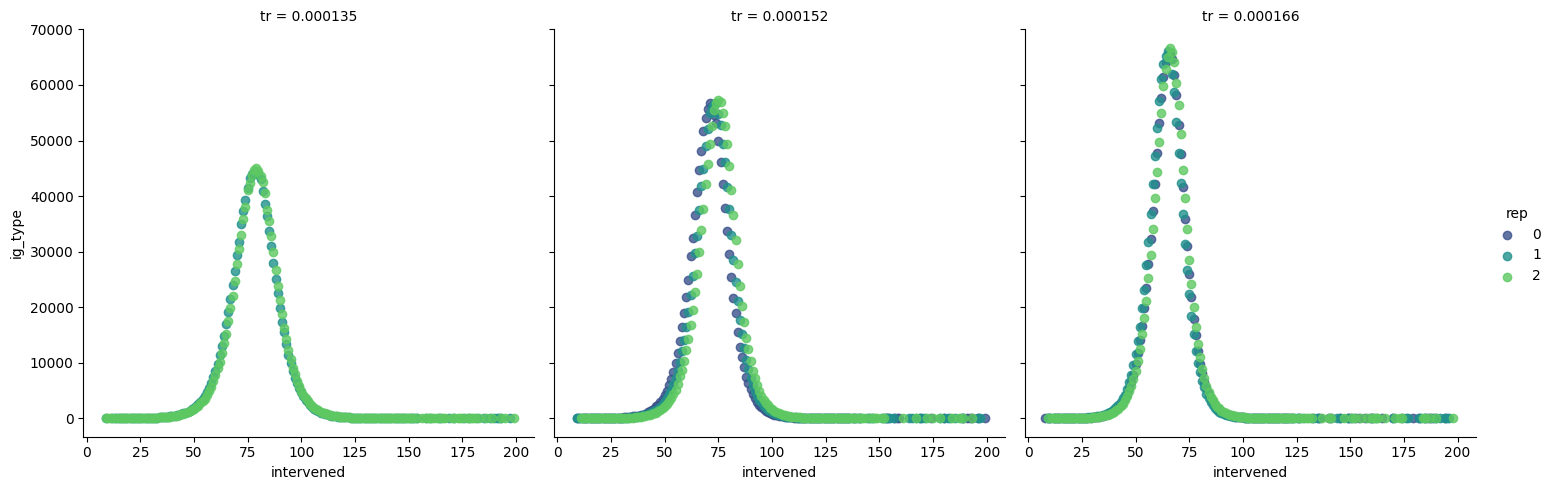

In [81]:
#5. 결과를 시각화하기
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.lmplot(
    data = count_mean.reset_index(),
    x="intervened",
    y="ig_type",
    hue = "rep",
    col="tr",
    fit_reg=False,
    palette="viridis"
)

plt.savefig('count_mean_lmplot.png')
plt.show()

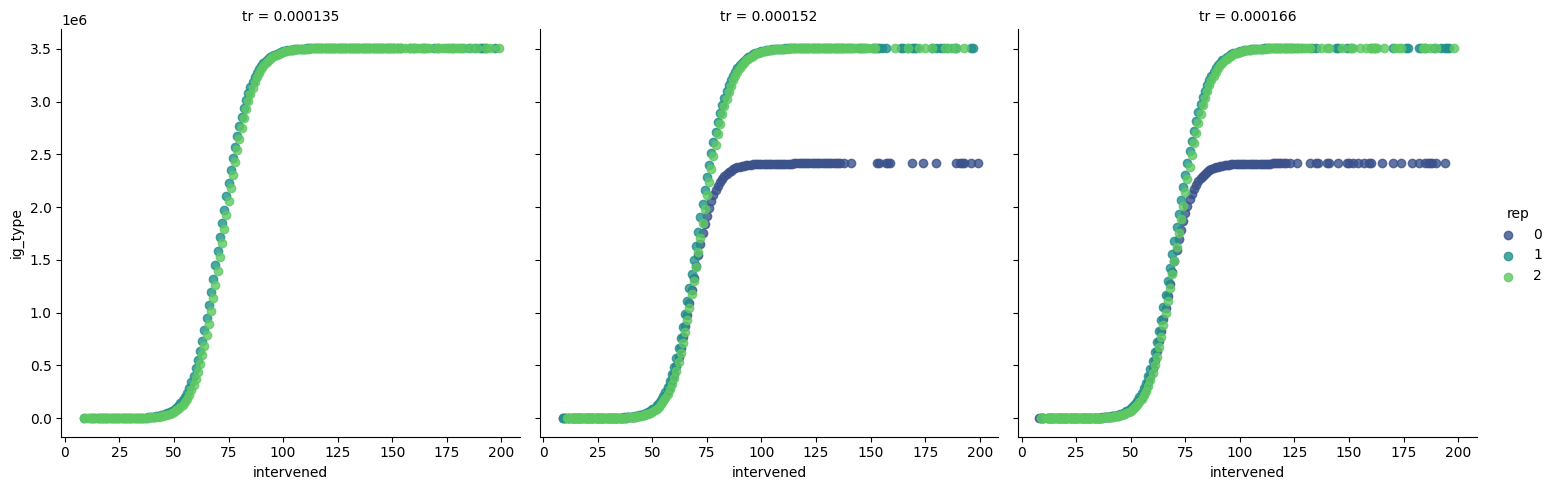

In [56]:
# 6. 평균을 계산하는 mean() 대신 누적 합계를 구하는 cumsum() 구하기.
cumulative_count = (
    intv_df
    .groupby(["rep","intervened","tr"])["ig_type"]
    .count()
    .groupby(level=["rep"])
    .cumsum()
    .reset_index()
)

fig = sns.lmplot(
    data=cumulative_count,
    x="intervened",
    y="ig_type",
    hue="rep",
    col="tr",
    fit_reg=False,
    palette="viridis"
)

plt.show()